In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from dependencies import *

In [4]:
x_s = []
y_s = []

NEW_IMAGE_RESIZE_VALUE = 450
CLASSIFIER_CLASSES = {'minor': 0, 'moderate': 1, 'severe': 2}
IMAGE_SHOW_SERIES = 35
RANDOM_TRAINING_STATE = 10
TEST_SIZE_PERCENTAGE = .2

In [5]:
collect_images_from_files(x_s, y_s, CLASSIFIER_CLASSES, NEW_IMAGE_RESIZE_VALUE)

In [6]:
x_s = np.array(x_s)
y_s = np.array(y_s)
x_s.shape

(248, 450, 450)

In [7]:
# Sklearn accepts only bidiomensional data, so we have to convert it

xs_reshape = x_s.reshape(len(x_s), -1)
xs_reshape.shape

(248, 202500)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    xs_reshape, 
    y_s, 
    random_state=RANDOM_TRAINING_STATE,
    test_size=TEST_SIZE_PERCENTAGE
)

In [9]:
x_train.shape, x_test.shape

((198, 202500), (50, 202500))

In [10]:
x_train, x_test = scale_data_tests(x_train, x_test)

In [11]:
classifier = SVC(C=1, kernel='rbf')
classifier.fit(x_train, y_train)

SVC(C=1)

In [12]:
classifier.score(x_test, y_test)

0.5

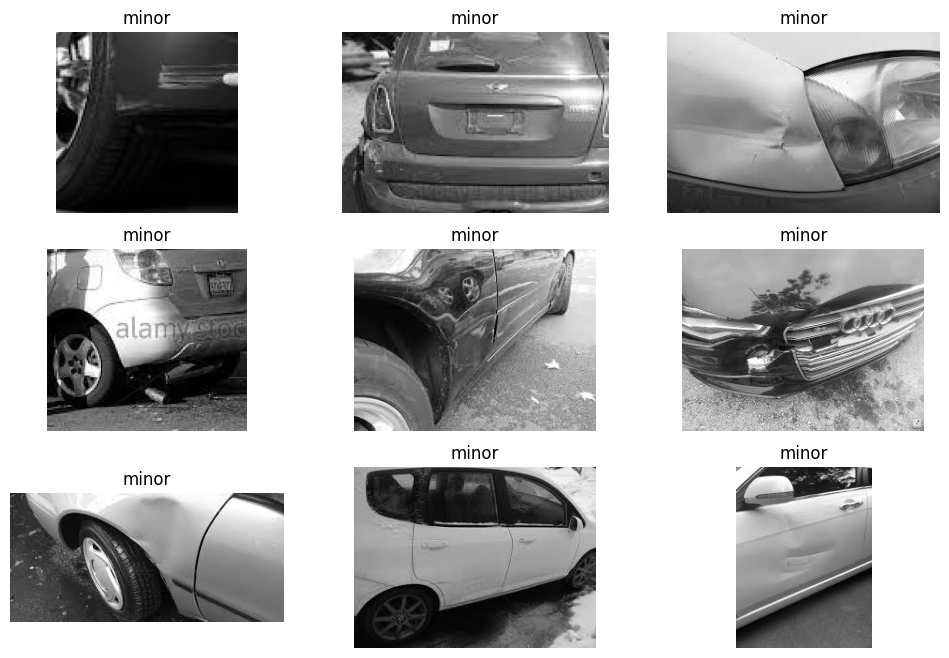

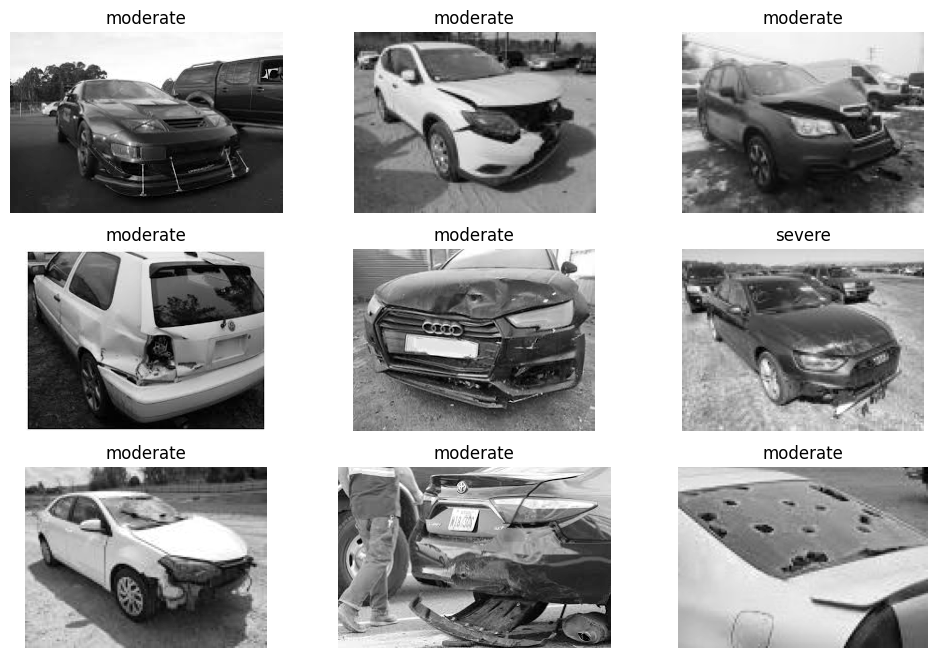

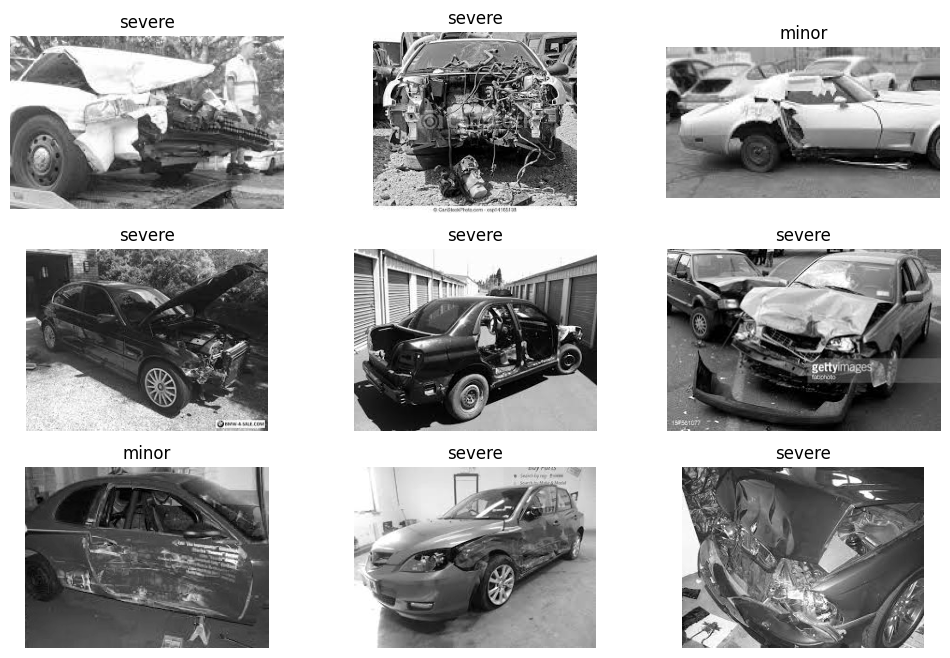

In [13]:
run_live_images_testing(classifier, IMAGE_SHOW_SERIES, NEW_IMAGE_RESIZE_VALUE)